### 1) Exploratory Data Analysis 

#### a) Central Tendency and Deviation of Variables

In [1]:
import pandas as pd

data = pd.read_csv("cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
import pandas as pd

data = pd.read_csv("cancer.csv")
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


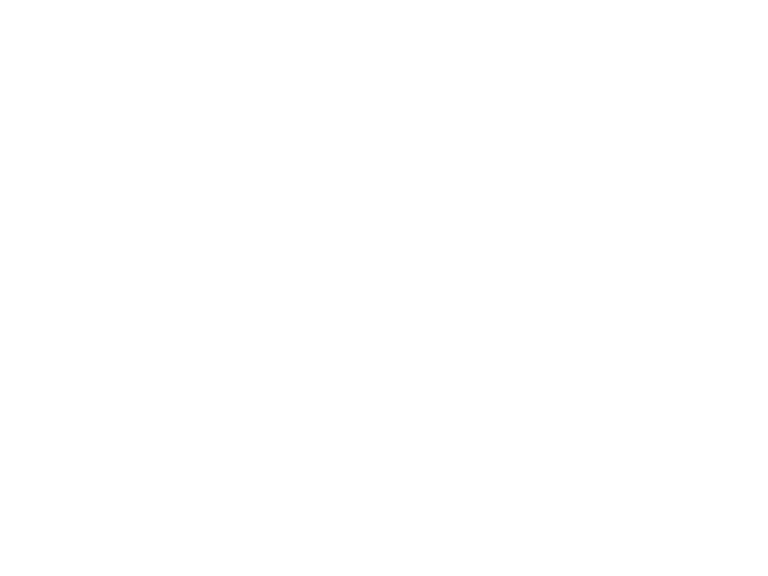

<AxesSubplot:>

In [3]:
%matplotlib notebook

data.plot.box()

#### Auxillary nodes' data is numerically distant from the rest of the data and thus has outliers compared to other variables.

<IPython.core.display.Javascript object>


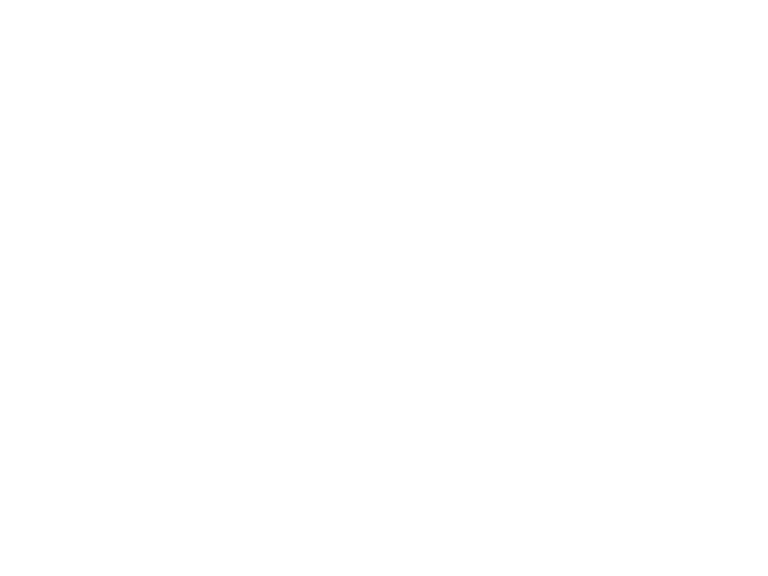

<AxesSubplot:>

In [4]:
maximum = 4 + 1.5 * (4-0)
new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()

#### The statistic mean of central tendency is depicted in the table above. The average age is 52.531148, the average year is 62.849180, the average number of auxiliary nodes is 4.036066, and the average number of survival is 1.265574. Each mean value indicates the dataset's center point. The distance between the data set and the mean on average of survival has a low standard deviation of 0.442364, indicating that they are near to the mean, whereas Age has a high standard deviation. The data points are spread out over a wide range of values, as indicated by the standard deviation of 10.744024.


#### b) Correlated Variables

In [5]:
corr = new_data.corr()

corr 

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


<AxesSubplot:>

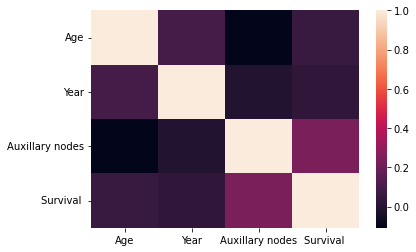

In [6]:
%matplotlib inline 

import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(corr)

#### The correlation between Survial and Auxillary nodes variables is small and thus will not be removed. In addition, all the variables are not closely correlated.

#### c) Skewness of the Variables

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

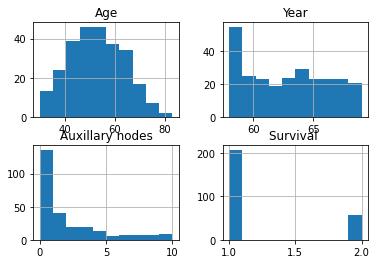

In [7]:
new_data.hist()

#### Age variable is evenly skewed (symmetrical), while the Year, Auxillary nodes and Survival variables are positively skewed (skewed right).

C:\Users\GLADYS~1.KAT\AppData\Local\Temp/ipykernel_20404/3016125678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data ["Auxillary nodes"] = new_data ["Auxillary nodes"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

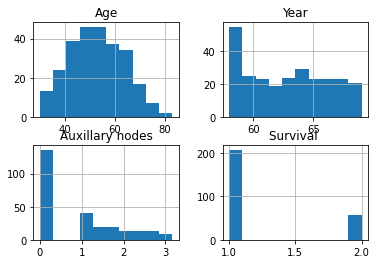

In [8]:
new_data ["Auxillary nodes"] = new_data ["Auxillary nodes"]**(0.5)

new_data.hist()

C:\Users\GLADYS~1.KAT\AppData\Local\Temp/ipykernel_20404/1932635852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data ["Year"] = new_data ["Year"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

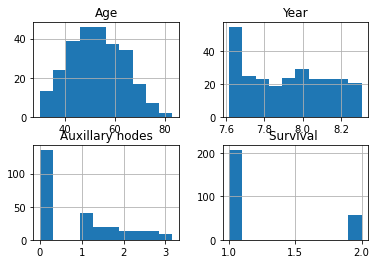

In [9]:
new_data ["Year"] = new_data ["Year"]**(0.5)

new_data.hist()

#### Auxillary nodes and Year variables remain positively skewed even after the attempt to fix skewness.

#### d) Normalization

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.373792,0.547723,0.0
1,0.000000,0.646282,0.000000,0.0
2,0.018868,0.094626,0.447214,0.0
3,0.018868,0.646282,0.632456,0.0
4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...
260,0.849057,0.373792,0.316228,0.0
261,0.867925,0.824461,0.000000,0.0
262,0.886792,0.646282,0.547723,0.0
263,0.905660,0.646282,0.316228,1.0


In [11]:
scaled_data.to_csv("newdata.csv")

### 2) Supervised Learning Models

In [12]:
#Import libraries 

import pandas as pd 
import matplotlib.pyplot as plt 

#Scikit learn - machine learning algorithims and methods


from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
final_data = pd.read_csv("newdata.csv")


x = final_data.drop(columns = ["Survival "])
y = final_data["Survival "]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, train_size = 0.6)

final_data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,0.000000,0.373792,0.547723,0.0
1,1,0.000000,0.646282,0.000000,0.0
2,2,0.018868,0.094626,0.447214,0.0
3,3,0.018868,0.646282,0.632456,0.0
4,4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...,...
260,260,0.849057,0.373792,0.316228,0.0
261,261,0.867925,0.824461,0.000000,0.0
262,262,0.886792,0.646282,0.547723,0.0
263,263,0.905660,0.646282,0.316228,1.0


#### a) Supervised Learning Models - Logistic Regression

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter 

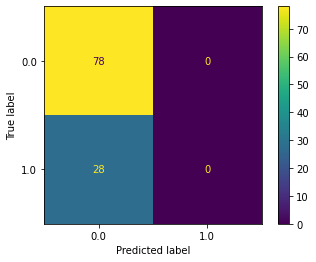

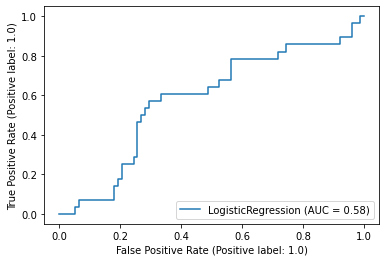

In [75]:
clf = LogisticRegression(solver = "sag", penalty = "none", C = 100, random_state = 10).fit(x_train, y_train)
clf.score(x_test,y_test)
y_pred = clf.predict(x_test)
labels = ["authentic", "forged"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, x_test, y_test)
plt.show()

#### b)  Supervised Learning Models - Random Forest 

              precision    recall  f1-score   support

         0.0       0.73      0.87      0.80        78
         1.0       0.23      0.11      0.15        28

    accuracy                           0.67       106
   macro avg       0.48      0.49      0.47       106
weighted avg       0.60      0.67      0.62       106



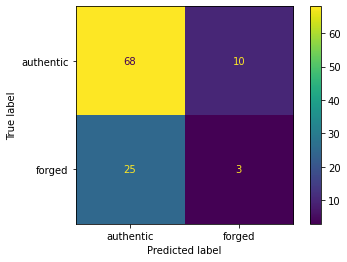

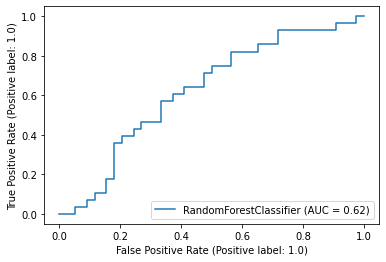

In [15]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 9, max_features = 'sqrt', random_state = 0). fit(x_train, y_train) 
rf_pred = rf .predict(x_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_ ))

plot_roc_curve(rf, x_test, y_test)
plt.show()

#### c) Supervised Learning Models - Support Vector Machine 

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


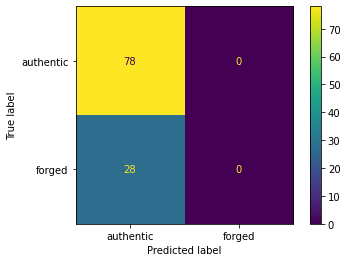

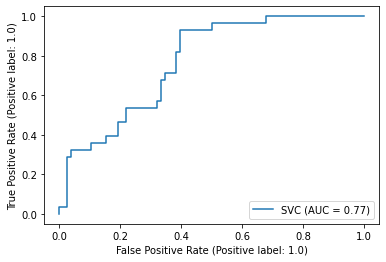

In [16]:
svm = SVC(random_state = 0, kernel = "linear", C = 1).fit(x_train, y_train)

svm_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_ ))

plot_roc_curve(svm, x_test, y_test)
plt.show()

#### d) Supervised Learning Models - Neural Network

              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84        78
         1.0       0.50      0.07      0.12        28

    accuracy                           0.74       106
   macro avg       0.62      0.52      0.48       106
weighted avg       0.68      0.74      0.65       106



C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


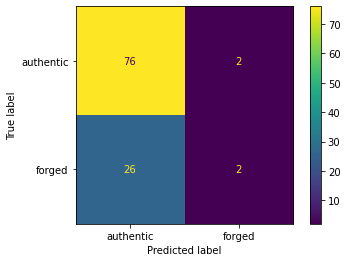

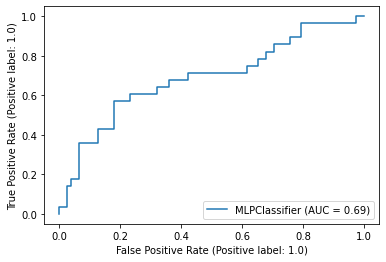

In [65]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(x_train, y_train)

nn_pred = nn.predict(x_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_ ))

plot_roc_curve(nn, x_test, y_test)
plt.show()

#### e) K - Fold Cross Validation - Logistic Regression

In [73]:
kf = KFold(n_splits=10)

accuracy= []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    accuracy.append(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(accuracy)

lr_average = sum(accuracy)/len(accuracy)
print(lr_average)

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.6875
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.75
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
[1.0, 0.6875, 0.8125, 0.75, 0.75, 0.8125, 0.8125, 1.0, 0.6875, 0.7333333333333333]
0.8045833333333332


C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### f) K- Fold Cross Validation - Random Forest

In [19]:
kf = KFold(n_splits=10)

accuracy = []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    rf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    accuracy.append(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(accuracy)

rf_average = sum(accuracy)/len(accuracy)
print(rf_average)

Accuracy for iteration 1 is 0.875
Accuracy for iteration 2 is 0.8125
Accuracy for iteration 3 is 0.875
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 0.9375
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.8
[0.875, 0.8125, 0.875, 0.75, 0.8125, 0.8125, 0.6875, 0.9375, 0.8125, 0.8]
0.8175000000000001


#### g) K - Fold Cross Validation - Support Vector Machine

In [20]:
kf = KFold(n_splits=10)

accuracy= []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    accuracy.append(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(accuracy)

svm_average = sum(accuracy)/len(accuracy)
print(svm_average)

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
[0.9375, 0.75, 0.8125, 0.75, 0.8125, 0.8125, 0.8125, 1.0, 0.6875, 0.7333333333333333]
0.8108333333333333


#### h) K - Fold Cross Validation - Neural Network

In [21]:
kf = KFold(n_splits=10)

accuracy= []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    nn.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    accuracy.append(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(accuracy)

nn_average = sum(accuracy)/len(accuracy)
print(nn_average)

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125


C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.875
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333
[1.0, 0.75, 0.8125, 0.75, 0.875, 0.8125, 0.75, 1.0, 0.6875, 0.7333333333333333]
0.8170833333333333


C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### i) GridSearchCV - Logistic Regression

In [74]:
# logistic Regression

parameters = {'solver':('newton-cg', 'ibfgs', 'liblinear','sag','saga'), 'penalty':('none','l1','l2','elasticnet'),'C':[100,10,1.0,0.1,0.01,0.001]}

clf_grid = GridSearchCV(clf,parameters)
clf_grid.fit(x_train,y_train)
clf_grid.best_params_

C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Gladys .N. Katubiya\anaconda3\li

{'C': 100, 'penalty': 'none', 'solver': 'sag'}

#### j) GridSearchCV  - Random Forest

In [23]:
# Random Forest 

parameters = {'max_features':('sqrt', 'log2'), 'n_estimators':[10,100,1000],'max_depth':[1,2,3,4,5,6,7,8,9]}

rf_grid = GridSearchCV(rf,parameters)
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 1000}

#### k) GridSearchCV - Support Vector Machine

In [24]:
# Support Vector Machine 

parameters = {'kernel':('linear', 'rbf'), 'C':[1,10]}

svm_grid = GridSearchCV(svm,parameters)
svm_grid.fit(x_train,y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

#### l) GridSearchCV - Neural Network

In [62]:
# Neural Network

parameters = {'solver':('lbfgs','sgd','adam'), 'learning_rate':('constant','invscaling','adaptive'), 'activation':('identity','logistic','tanh','relu')}

nn_grid = GridSearchCV(nn,parameters)
nn_grid.fit(x_train,y_train)
nn_grid.best_params_

C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to c

{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'lbfgs'}

#### Based off the AUC of each algorithim ROC curve, the best model for this problem is the support vector machine algorithim. 

#### 3) Evaluate if the algorithims are overfitting ? 

#### Logistic Regression

In [26]:

print ("The accuracy score for Logistic Regression is: " + str(clf.score(x_test, y_test)))
print ("The cross validation accuracy score is: " + str(lr_average))

print("")
print ("The cross validation accuracy score is greater than the Logistic Regression accuracy score, thus the model is overfitting.") 

The accuracy score for Logistic Regression is: 0.7358490566037735
The cross validation accuracy score is: 0.8108333333333333

The cross validation accuracy score is greater than the Logistic Regression accuracy score, thus the model is overfitting.


#### Random Forest

In [27]:
print ("The accuracy score for Random Forest is: " + str(rf.score(x_test, y_test)))
print ("The cross validation accuracy score is: " + str(rf_average))

print("")
print ("The cross validation accuracy score is greater than the Random Forest accuracy score, thus the model is overfitting.") 



The accuracy score for Random Forest is: 0.6792452830188679
The cross validation accuracy score is: 0.8175000000000001

The cross validation accuracy score is greater than the Random Forest accuracy score, thus the model is overfitting.


#### Support Vector Machine

In [28]:
print ("The accuracy score for Support Vector Machine is: " + str(svm.score(x_test, y_test)))
print ("The cross validation accuracy score is: " + str(svm_average))

print("")
print ("The cross validation accuracy score is greater than the Support Vector Machine accuracy score, thus the model is overfitting.") 

The accuracy score for Support Vector Machine is: 0.7358490566037735
The cross validation accuracy score is: 0.8108333333333333

The cross validation accuracy score is greater than the Support Vector Machine accuracy score, thus the model is overfitting.


#### Neural Network

In [29]:
print ("The accuracy score for Neural Network is: " + str(nn.score(x_test, y_test)))
print ("The cross validation accuracy score is: " + str(nn_average))

print("")
print ("The cross validation accuracy score is greater than the Neural Network accuracy score, thus the model is overfitting.") 

The accuracy score for Neural Network is: 0.7358490566037735
The cross validation accuracy score is: 0.8170833333333333

The cross validation accuracy score is greater than the Neural Network accuracy score, thus the model is overfitting.


### 4) Machine Learning Function 

####  Machine learning function displayed is the best model for this problem.

In [57]:
def machine_learning (data, SVC):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve 
    from sklearn.linear_model import LogisticRegression 
    from sklearn.ensemble import RandomForestClassifier 
    from sklearn.svm import SVC 
    from sklearn.neural_network import MLPClassifier 
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    
    final_data = pd.read_csv("newdata.csv")
    
    x = final_data.drop(columns = ["Survival "])
    y = final_data["Survival "]
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, train_size = 0.6)
    
    
    print (" Model is being created...")
    
    
    svm = SVC(random_state = 0, kernel = "linear", C = 1).fit(x_train, y_train)

    svm_pred = svm.predict(x_test)

    cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
    disp.plot()
    print(classification_report(y_test, svm_pred, labels = clf.classes_ ))

    plot_roc_curve(svm, x_test, y_test)
    plt.show()
    
    print ("Support Vector Machine algorithim has been created...")
    
    kf = KFold(n_splits=10)

    accuracy= []

    iteration = 1
    for train_indices, test_indices in kf.split(x_train): 
        svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
        print("Accuracy for iteration " + str(iteration) + " is " + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
        accuracy.append(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
        iteration += 1
    
        print(accuracy)

        svm_average = sum(accuracy)/len(accuracy)
        print(svm_average)
    
    
    
    
        print ("The accuracy score for Support Vector Machine is: " + str(svm.score(x_test, y_test)))
        print ("The cross validation accuracy score is: " + str(svm_average))

        print("")
        performance_metrics = print ("The cross validation accuracy score is greater than the Support Vector Machine accuracy score, the model is overfitting.") 
        
    
    
        return performance_metrics

 Model is being created...
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


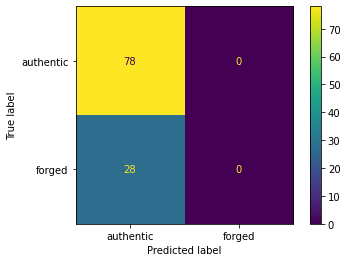

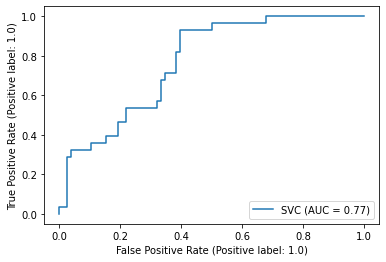

Support Vector Machine algorithim has been created...
Accuracy for iteration 1 is 0.9375
[0.9375]
0.9375
The accuracy score for Support Vector Machine is: 0.7358490566037735
The cross validation accuracy score is: 0.9375

The cross validation accuracy score is greater than the Support Vector Machine accuracy score, the model is overfitting.


In [58]:
machine_learning (data, SVC)

#### OR

In [59]:
def machine_learning (data, SVC):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve 
    from sklearn.linear_model import LogisticRegression 
    from sklearn.ensemble import RandomForestClassifier 
    from sklearn.svm import SVC 
    from sklearn.neural_network import MLPClassifier 
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    
    final_data = pd.read_csv("newdata.csv")
    
    x = final_data.drop(columns = ["Survival "])
    y = final_data["Survival "]
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, train_size = 0.6)
    
    
    print (" Model is being created...")
    
    
    svm = SVC(random_state = 0, kernel = "linear", C = 1).fit(x_train, y_train)

    svm_pred = svm.predict(x_test)

    cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
    disp.plot()
    print(classification_report(y_test, svm_pred, labels = clf.classes_ ))

    plot_roc_curve(svm, x_test, y_test)
    plt.show()
    
    performance_metrics = print ("Support Vector Machine algorithim has been created...")
    
    
    return performance_metrics

 Model is being created...
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        78
         1.0       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gladys .N. Katubiya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


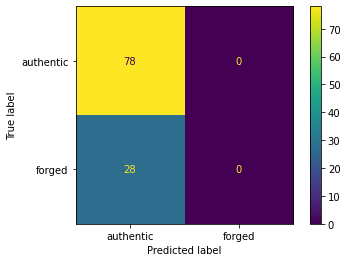

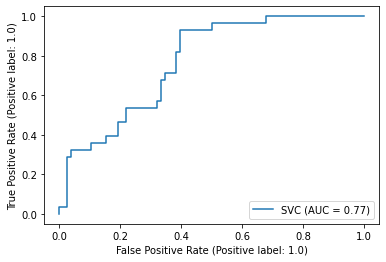

Support Vector Machine algorithim has been created...


In [60]:
machine_learning (data, SVC)

### NOTES

#### After running the gridsearch, I updated the hyparameters with gridsearch results, causing most algorithims to have warnings.